In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    data = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    filename = data.dataframeName
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [9]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv has 284807 rows in reality, but we are only loading/previewing the first 1000 rows
data = pd.read_csv('creditcard.csv', delimiter=',', nrows = nRowsRead)
data.dataframeName = 'creditcard.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [11]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
data.dropna(inplace=True)

<Axes: ylabel='Density'>

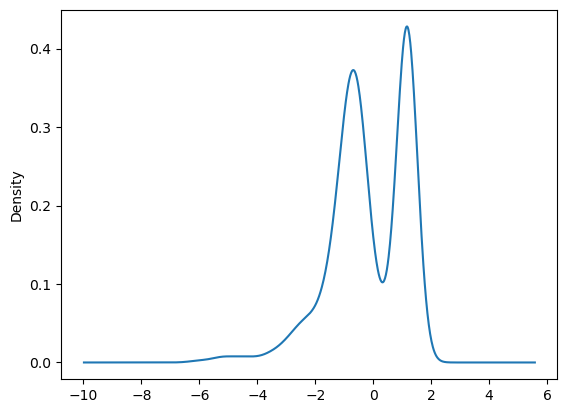

In [20]:
data['V1'].plot(kind='kde')

<Axes: ylabel='Density'>

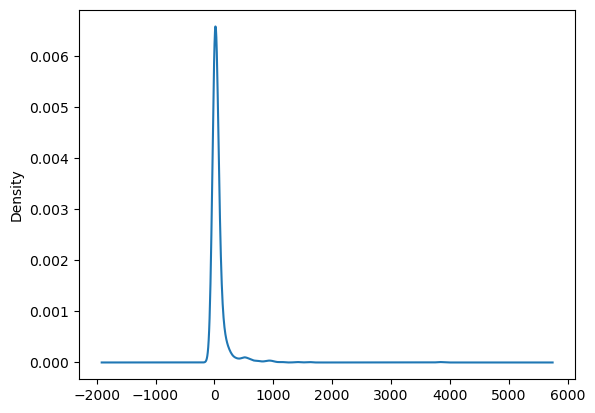

In [22]:
data['Amount'].plot(kind='kde')

<Axes: ylabel='Density'>

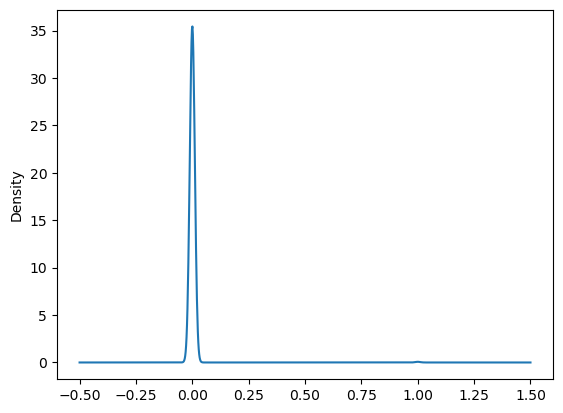

In [24]:
data['Class'].plot(kind='kde')

<Axes: ylabel='Density'>

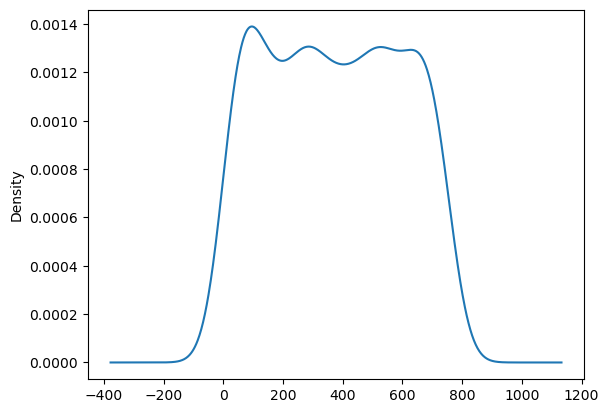

In [26]:
data['Time'].plot(kind='kde')

<Axes: ylabel='Density'>

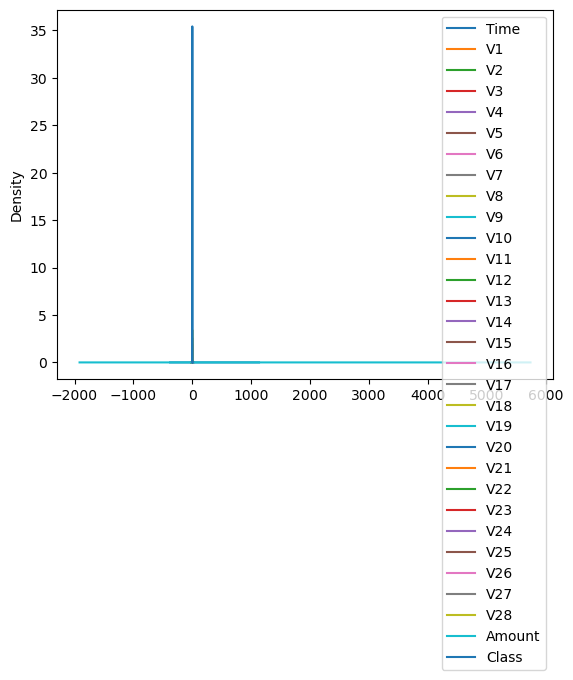

In [28]:
data.plot(kind='kde')

In [30]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [32]:
# Splitting features and target variable
X = data.drop(['Class'], axis=1)
y = data['Class']

In [34]:
!pip install lightgbm

In [36]:
!pip install catboost

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as catb
from imblearn.over_sampling import SMOTE

In [40]:
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(X)

# Filtering out the outliers
mask = outliers != -1
X, y = X[mask], y[mask]

In [42]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 2 or less
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    #recall = recall_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

    return accuracy, precision, recall, f1, tn, fp, fn, tp

# Initialize results list
results = []

In [57]:
# Decision Tree
dt_params = {'max_depth': [5, 10, 15]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring='accuracy', cv=3, n_jobs=-1)
dt_grid_search.fit(X_train_resampled, y_train_resampled)
dt_best_model = dt_grid_search.best_estimator_
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_tn, dt_fp, dt_fn, dt_tp = evaluate_model(dt_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'DecisionTree',
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1,
    'True Negative': dt_tn,
    'False Positive': dt_fp,
    'False Negative': dt_fn,
    'True Positive': dt_tp
})

In [59]:
# Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_resampled, y_train_resampled)
rf_best_model = rf_grid_search.best_estimator_
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_tn, rf_fp, rf_fn, rf_tp = evaluate_model(rf_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'RandomForest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1,
    'True Negative': rf_tn,
    'False Positive': rf_fp,
    'False Negative': rf_fn,
    'True Positive': rf_tp
})

In [61]:
# AdaBoost
ab_params = {'n_estimators': [50, 100]}
ab_grid_search = GridSearchCV(AdaBoostClassifier(), ab_params, scoring='accuracy', cv=3, n_jobs=-1)
ab_grid_search.fit(X_train_resampled, y_train_resampled)
ab_best_model = ab_grid_search.best_estimator_
ab_accuracy, ab_precision, ab_recall, ab_f1, ab_tn, ab_fp, ab_fn, ab_tp = evaluate_model(ab_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'AdaBoost',
    'Accuracy': ab_accuracy,
    'Precision': ab_precision,
    'Recall': ab_recall,
    'F1 Score': ab_f1,
    'True Negative': ab_tn,
    'False Positive': ab_fp,
    'False Negative': ab_fn,
    'True Positive': ab_tp
})

In [63]:
# Bagging
bg_params = {'n_estimators': [10, 20]}
bg_grid_search = GridSearchCV(BaggingClassifier(), bg_params, scoring='accuracy', cv=3, n_jobs=-1)
bg_grid_search.fit(X_train_resampled, y_train_resampled)
bg_best_model = bg_grid_search.best_estimator_
bg_accuracy, bg_precision, bg_recall, bg_f1, bg_tn, bg_fp, bg_fn, bg_tp = evaluate_model(bg_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'Bagging',
    'Accuracy': bg_accuracy,
    'Precision': bg_precision,
    'Recall': bg_recall,
    'F1 Score': bg_f1,
    'True Negative': bg_tn,
    'False Positive': bg_fp,
    'False Negative': bg_fn,
    'True Positive': bg_tp
})

In [73]:
# XGBoost
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 6]}
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, scoring='accuracy', cv=3, n_jobs=-1)
xgb_grid_search.fit(X_train_resampled, y_train_resampled)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_tn, xgb_fp, xgb_fn, xgb_tp = evaluate_model(xgb_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'XGBoost',
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1 Score': xgb_f1,
    'True Negative': xgb_tn,
    'False Positive': xgb_fp,
    'False Negative': xgb_fn,
    'True Positive': xgb_tp
})

C:\Users\Administrator\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:39:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [75]:
# LightGBM
lgb_params = {'n_estimators': [100, 200], 'num_leaves': [31, 63]}
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(), lgb_params, scoring='accuracy', cv=3, n_jobs=-1)
lgb_grid_search.fit(X_train_resampled, y_train_resampled)
lgb_best_model = lgb_grid_search.best_estimator_
lgb_accuracy, lgb_precision, lgb_recall, lgb_f1, lgb_tn, lgb_fp, lgb_fn, lgb_tp = evaluate_model(lgb_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'LightGBM',
    'Accuracy': lgb_accuracy,
    'Precision': lgb_precision,
    'Recall': lgb_recall,
    'F1 Score': lgb_f1,
    'True Negative': lgb_tn,
    'False Positive': lgb_fp,
    'False Negative': lgb_fn,
    'True Positive': lgb_tp
})

[LightGBM] [Info] Number of positive: 790, number of negative: 790
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1580, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [77]:
# CatBoost
cb_params = {'iterations': [100, 200], 'depth': [4, 6]}
cb_grid_search = GridSearchCV(catb.CatBoostClassifier(verbose=0), cb_params, scoring='accuracy', cv=3, n_jobs=-1)
cb_grid_search.fit(X_train_resampled, y_train_resampled)
cb_best_model = cb_grid_search.best_estimator_
cb_accuracy, cb_precision, cb_recall, cb_f1, cb_tn, cb_fp, cb_fn, cb_tp = evaluate_model(cb_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'CatBoost',
    'Accuracy': cb_accuracy,
    'Precision': cb_precision,
    'Recall': cb_recall,
    'F1 Score': cb_f1,
    'True Negative': cb_tn,
    'False Positive': cb_fp,
    'False Negative': cb_fn,
    'True Positive': cb_tp
})

In [79]:
result_df = pd.DataFrame(results)
result_df.sort_values(by='Accuracy', ascending=False, inplace=True)

In [81]:
result_df

,Model,Accuracy,Precision,Recall,F1 Score,True Negative,False Positive,False Negative,True Positive
1,RandomForest,1.000000,1.0,1.0,1.0,198,0,0,0
2,AdaBoost,1.000000,1.0,1.0,1.0,198,0,0,0
4,XGBoost,1.000000,1.0,1.0,1.0,198,0,0,0
5,XGBoost,1.000000,1.0,1.0,1.0,198,0,0,0
6,XGBoost,1.000000,1.0,1.0,1.0,198,0,0,0
7,XGBoost,1.000000,1.0,1.0,1.0,198,0,0,0
8,XGBoost,1.000000,1.0,1.0,1.0,198,0,0,0
10,CatBoost,1.000000,1.0,1.0,1.0,198,0,0,0
0,DecisionTree,0.994949,0.0,1.0,0.0,197,1,0,0
3,Bagging,0.994949,0.0,1.0,0.0,197,1,0,0
